In [1]:
%run Model.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.605894736842117
Uptake: -10.0
Yield for model SucD = 0.9605894736842118
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.708085106382972
Uptake: -10.0
Yield for model Akg = 0.9708085106382972


In [2]:
model_sucd.optimize()

,fluxes,reduced_costs
CYTDK2,0.00000,-7.273028e-17
XPPT,0.00000,-1.504671e-02
HXPRT,0.00000,-1.504671e-02
NDPK5,0.00000,-0.000000e+00
SHK3Dr,0.33424,0.000000e+00
...,...,...
HBCT,0.00000,0.000000e+00
HBCR,0.00000,0.000000e+00
ADH,0.00000,-1.170938e-17
EX_bdo,0.00000,0.000000e+00


In [3]:
model_akg.optimize()

,fluxes,reduced_costs
CYTDK2,0.000000,-2.220446e-16
XPPT,0.000000,-1.702128e-01
HXPRT,0.000000,-1.702128e-01
NDPK5,0.000000,-1.927880e-16
SHK3Dr,0.000000,-0.000000e+00
...,...,...
HBCT,9.708085,5.551115e-17
HBCR,9.708085,-9.992007e-16
ADH,9.708085,-1.301043e-16
EX_bdo,9.708085,0.000000e+00


# Biomass growth

## Substrate: glucose

The biomass growth of the sucd model is calculated with substrate glucose

In [4]:
# model:sucd
medium = model_sucd.medium
with model_sucd:
    medium['EX_glc__D_e'] = 10
    medium['EX_xyl__D_e'] = 0
    model_sucd.medium = medium
    solution = model_sucd.optimize()
    print(solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.8769972144269966


The biomass growth of the akg model is calculated with substrate glucose

In [5]:
# model:akg
medium = model_akg.medium
with model_akg:
    medium['EX_glc__D_e'] = 10
    medium['EX_xyl__D_e'] = 0
    model_akg.medium = medium
    solution = model_akg.optimize()
    print(solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.0


## BDO production in Anaerobic conditions

The BDO production of the sucd model is calculated under anaerobic conditions with a glucose substrate

In [6]:
with model_sucd:
    medium = model_sucd.medium
    medium['EX_glc__D_e']=10
    medium['EX_xyl__D_e']=0
    medium['EX_o2_e'] =0    
    model_sucd.medium = medium
    with model_sucd:
        model_sucd.objective = model_sucd.reactions.EX_bdo
        BDO_production = model_sucd.optimize().objective_value

print(BDO_production)


6.192761904761846


The BDO production of akg model is calculated under anaerobic conditions with a glucose substrate

In [7]:
with model_akg:
    medium = model_akg.medium
    medium['EX_glc__D_e']=10
    medium['EX_xyl__D_e']=0
    medium['EX_o2_e'] =0    
    model_akg.medium = medium
    with model_akg:
        model_akg.objective = model_akg.reactions.EX_bdo
        BDO_production = model_akg.optimize().objective_value

print(BDO_production)

4.268235294117692


In [8]:
medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_xyl__D_e': 0}

## Looping through the carbons Sources

### Model Sucd

In [16]:

#Firstly, the lists which will include the reactions id, the reactions and metabolite names and the metabolites id, are created :

reaction_id=[]
reaction_names=[]
carbon_name=[]
carbon_id=[]

for reaction in model_sucd.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id.append(reaction.id)
            reaction_names.append(reaction.name) 
            carbon_name.append(metabolite.name)
            carbon_id.append(metabolite.id)

# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_sucd:
    max_base_growth = model_sucd.slim_optimize()
    model_sucd.objective = model_sucd.reactions.EX_bdo
    max_base_production = model_sucd.slim_optimize()


# A loop is created that will check the max growth and the BDO production for the different carbon sources

 
# Now, we will loop through every carbon source in the model and observe the production of BDO.     
# We define the lists we are going to use
max_growth = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production = [] #All the values of the bdo production for the different carbon sources   
medium=model_sucd.medium

with model_sucd:
    for reaction in reaction_id:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=10
        # It is very important to notice that the loop for every carbon source will take place with the concentration being equal to 10
        model_sucd.medium = medium
        with model_sucd:
            max_growth.append(model_sucd.slim_optimize(error_value=0.))
            model_sucd.objective = model_sucd.reactions.EX_bdo
            max_production.append(model_sucd.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        

CARBON1 = {'Reaction_name': reaction_names,
             'Reaction_ID': reaction_id,
             'Carbon_Metabolite_Name': carbon_name,
              'Carbon_Metabolite_ID': carbon_id,
            'Max_growth':max_growth,
           'Max_BDO_production': max_production}





Printing the table with the results descendigly

In [21]:
df1 = pd.DataFrame(CARBON1, columns = ['Carbon_Metabolite_ID','Max_growth', 'Max_BDO_production'])

df1= df1[df1['Max_growth'] != 0] 
df1=df1.sort_values(by='Max_growth', ascending=False).head(200) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df1)


    Carbon_Metabolite_ID    Max_growth  Max_BDO_production
190             malthx_e  5.466242e+00        5.992168e+01
215           14glucan_e  5.466242e+00        5.992168e+01
77              maltpt_e  4.525823e+00        4.960589e+01
239            maltttr_e  3.585404e+00        3.929011e+01
268              anhgm_e  2.702371e+00        2.950063e+01
128             malttr_e  2.682602e+00        2.939537e+01
108             ocdcea_e  2.665123e+00        2.929011e+01
101              ocdca_e  2.629139e+00        2.886905e+01
65               hdcea_e  2.359259e+00        2.592168e+01
171               hdca_e  2.323275e+00        2.550063e+01
67              ttdcea_e  2.053394e+00        2.255326e+01
84               ttdca_e  2.017410e+00        2.213221e+01
210             uacgam_e  1.945630e+00        2.090414e+01
175               malt_e  1.779800e+00        1.950063e+01
64                 tre_e  1.779800e+00        1.950063e+01
4                cellb_e  1.779800e+00        1.950063e+

### A graph with BDO production as a function of growth for the different carbon sourse but in the same concentration for Sucd model

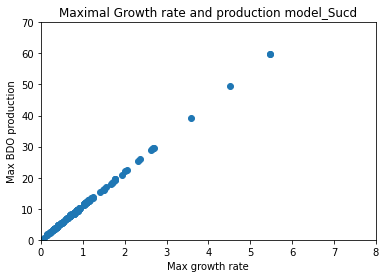

In [22]:

# And we can create a scatterplot of the production over growth to view the distribution
plt.scatter(df1.get('Max_growth'), df1.get('Max_BDO_production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 70)
plt.title('Maximal Growth rate and production model_Sucd')

plt.show()

## Model akg

In [13]:



#Firstly, the lists which will include the reactions id, the reactions and metabolite names and the metabolites id, are created :

reaction_id=[]
reaction_names=[]
carbon_name=[]
carbon_id=[]

for reaction in model_akg.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id.append(reaction.id)
            reaction_names.append(reaction.name) 
            carbon_name.append(metabolite.name)
            carbon_id.append(metabolite.id)

# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_akg:
    max_base_growth = model_akg.slim_optimize()
    model_akg.objective = model_akg.reactions.EX_bdo
    max_base_production = model_akg.slim_optimize()


# A loop is created that will check the max growth and the BDO production for the different carbon sources

   
# Now, we will loop through every carbon source in the model and see how good it produces more BDO.     
# We define the lists we are going to use
max_growth = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production = [] #All the values of the bdo production for the different carbon sources 
medium=model_akg.medium

with model_akg:
    for reaction in reaction_id:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=10
        model_akg.medium = medium
        with model_akg:
            max_growth.append(model_akg.slim_optimize(error_value=0.))
            model_akg.objective = model_akg.reactions.EX_bdo
            max_production.append(model_akg.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        

CARBON2 = {'Reaction_name': reaction_names,
             'Reaction_ID': reaction_id,
             'Carbon_Metabolite_Name': carbon_name,
              'Carbon_Metabolite_ID': carbon_id,
            'Max_growth':max_growth,
           'Max_BDO_production': max_production}





#### Presenting the results descendingly

In [18]:
df2 = pd.DataFrame(CARBON2, columns = ['Carbon_Metabolite_ID','Max_growth', 'Max_BDO_production'])

df2= df2[df2['Max_growth'] != 0] 
df2=df2.sort_values(by='Max_growth', ascending=False).head(200) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df2)


    Carbon_Metabolite_ID    Max_growth  Max_BDO_production
190             malthx_e  6.042387e+01        6.042387e+01
215           14glucan_e  6.042387e+01        6.042387e+01
77              maltpt_e  5.010129e+01        5.010129e+01
239            maltttr_e  3.970809e+01        3.970809e+01
268              anhgm_e  2.981447e+01        2.981447e+01
128             malttr_e  2.970809e+01        2.970809e+01
108             ocdcea_e  2.960170e+01        2.960170e+01
101              ocdca_e  2.917617e+01        2.917617e+01
65               hdcea_e  2.619745e+01        2.619745e+01
171               hdca_e  2.577191e+01        2.577191e+01
67              ttdcea_e  2.279319e+01        2.279319e+01
84               ttdca_e  2.236766e+01        2.236766e+01
210             uacgam_e  2.112652e+01        2.112652e+01
4                cellb_e  1.970809e+01        1.970809e+01
175               malt_e  1.970809e+01        1.970809e+01
64                 tre_e  1.970809e+01        1.970809e+

### A graph with BDO production as a function of growth for the different carbon sourse but in the same concentration for akg model

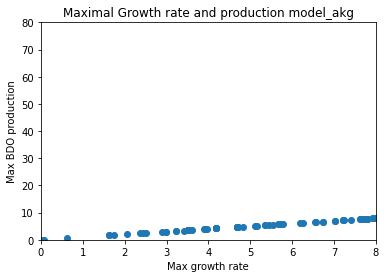

In [19]:


plt.scatter(df2.get('Max_growth'), df2.get('Max_BDO_production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 80)
plt.title('Maximal Growth rate and production model_akg')

plt.show()